In [ ]:
import matplotlib.pyplot as plt
import numpy as np

data = np.loadtxt('https://lectures.scientific-python.org/_downloads/087d8fe936fcb7a4762b9850b932cf9e/populations.txt')
# year	hare	lynx	carrot
years = data[:,0].astype(int)
hares = data[:,1]
lynxes = data[:,2]
carrots = data[:,3]
#print(len(years))

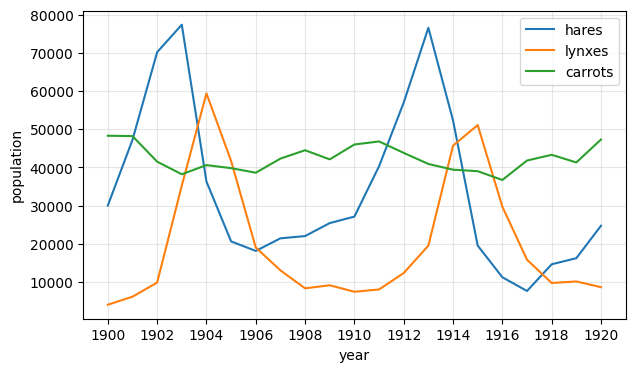

In [ ]:
plt.figure(figsize=(7,4))
plt.plot(years, hares, label = 'hares')
plt.plot(years, lynxes, label = 'lynxes')
plt.plot(years, carrots, label = 'carrots')
plt.xlabel('year')
plt.ylabel('population')
plt.xticks(np.arange(min(years), max(years) + 1, 2))
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

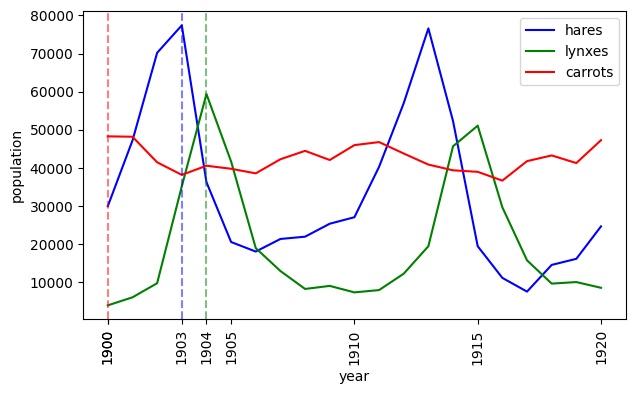

In [ ]:
max_hares_year = years[np.argmax(hares)]
max_lynxes_year = years[np.argmax(lynxes)]
max_carrots_year = years[np.argmax(carrots)]

plt.figure(figsize=(7,4))
plt.plot(years, hares, color='blue', label = 'hares')
plt.plot(years, lynxes, color='g', label = 'lynxes')
plt.plot(years, carrots, color='r', label = 'carrots')
plt.xlabel('year')
plt.ylabel('population')
plt.axvline(x = max_hares_year, color = 'b', alpha = 0.5, linestyle = '--')
plt.axvline(x = max_lynxes_year, color = 'g', alpha = 0.5, linestyle = '--')
plt.axvline(x = max_carrots_year, color = 'r', alpha = 0.5, linestyle = '--')
plt.xticks(np.hstack([np.arange(min(years), max(years) + 1, 5), [max_hares_year, max_lynxes_year, max_carrots_year]]))
plt.tick_params(axis='x', rotation=90)
plt.legend()
plt.show()

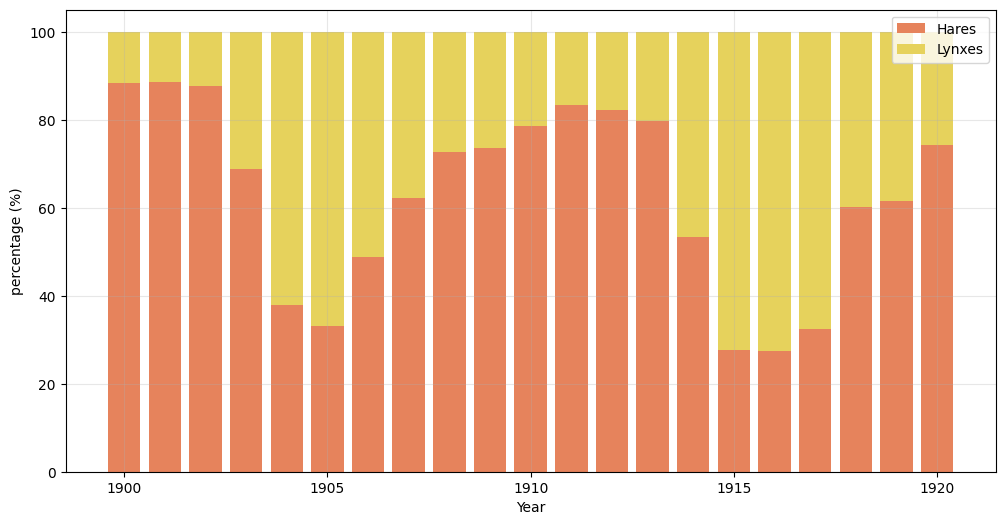

In [ ]:
total = hares + lynxes
hares_percent = hares / total * 100
lynxes_percent = lynxes / total * 100

plt.figure(figsize=(12, 6))
plt.bar(years, hares_percent, label='Hares', color='#E6835C')
plt.bar(years, lynxes_percent, bottom=hares_percent, label='Lynxes', color='#E6D25C')
plt.xlabel('Year')
plt.ylabel('percentage (%)')
plt.xticks(np.arange(min(years), max(years) + 1, 5))
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

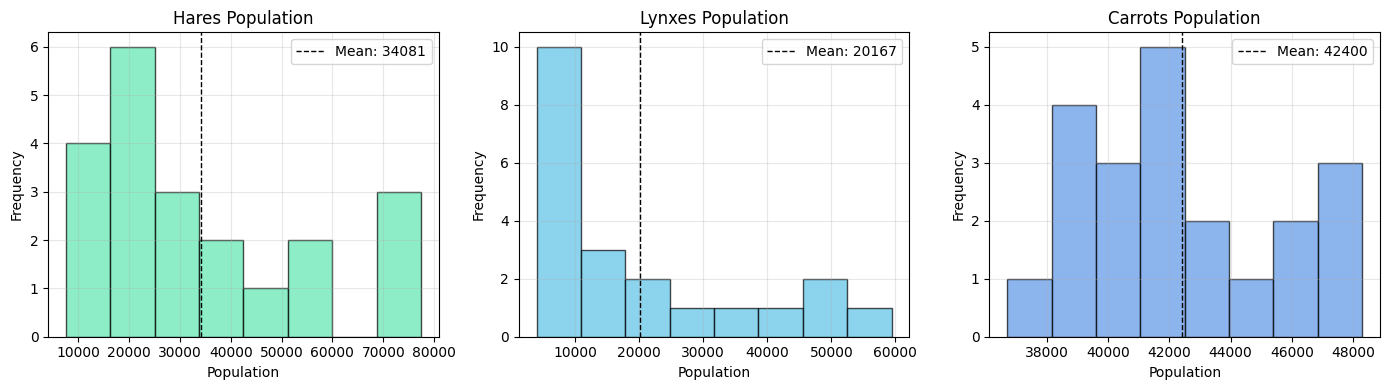

Standard Deviation for Hares: 20897.91
Standard Deviation for Lynxes: 16254.59
Standard Deviation for Carrots: 3322.51


In [ ]:
means = [np.mean(hares), np.mean(lynxes), np.mean(carrots)]
stds = [np.std(hares), np.std(lynxes), np.std(carrots)]

fig, axes = plt.subplots(1, 3, figsize=(14, 4))
species = ['Hares', 'Lynxes', 'Carrots']
colors = ['#5CE6AF', '#5CC1E6', '#5C95E6']
data_list = [hares, lynxes, carrots]

for i, (ax, data, color, specie) in enumerate(zip(axes, data_list, colors, species)):
    ax.hist(data, bins=8, alpha=0.7, color=color, edgecolor='black')
    ax.axvline(means[i], color = 'black', linestyle='--', linewidth=1, label=f'Mean: {means[i]:.0f}')
    ax.set_xlabel('Population')
    ax.set_ylabel('Frequency')
    ax.set_title(f'{specie} Population')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

for i, _ in enumerate(species):
  print(f"Standard Deviation for {_}: {stds[i]:.2f}")


Dominance array: ['H', 'H', 'H', 'H', 'L', 'L', 'L', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'H', 'L', 'L', 'L', 'H', 'H', 'H']


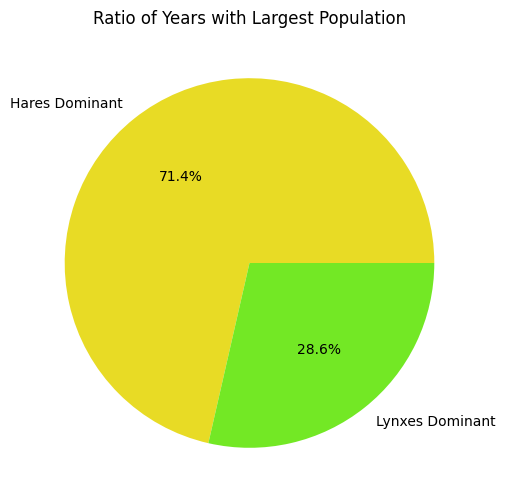

In [ ]:
dominance = ['H' if h > l else 'L' for h, l in zip(hares, lynxes)]
h_count = dominance.count('H')
l_count = dominance.count('L')

print("Dominance array:", dominance)

plt.figure(figsize=(8, 6))
plt.pie([h_count, l_count], labels=['Hares Dominant', 'Lynxes Dominant'],
        autopct='%1.1f%%', colors=['#E8DB25', '#73E825'])
plt.title('Ratio of Years with Largest Population')
plt.show()

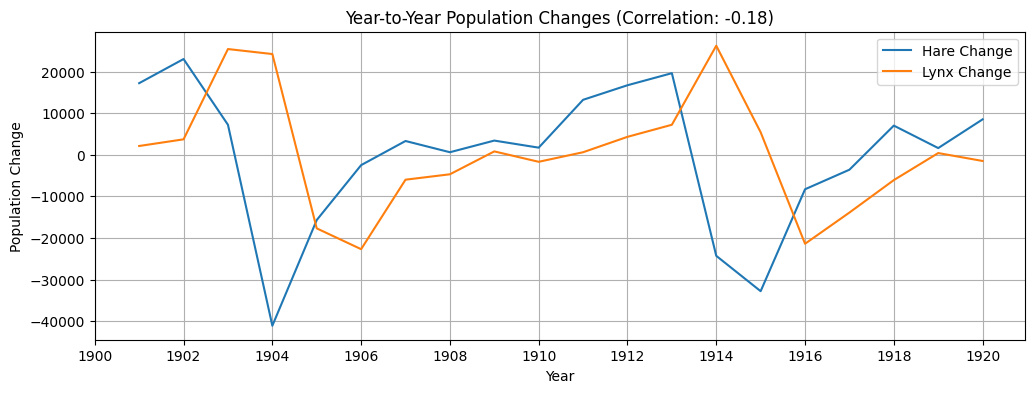

In [ ]:
hare_changes = np.diff(hares)
lynx_changes = np.diff(lynxes)
correlation = np.corrcoef(hare_changes, lynx_changes)[0, 1]

plt.figure(figsize=(12, 4))
plt.plot(years[1:], hare_changes, label='Hare Change')
plt.plot(years[1:], lynx_changes, label='Lynx Change')
plt.xlabel('Year')
plt.ylabel('Population Change')
plt.title(f'Year-to-Year Population Changes (Correlation: {correlation:.2f})')
plt.xticks(np.arange(min(years), max(years) + 1, 2))
plt.legend()
plt.grid(True)
plt.show()

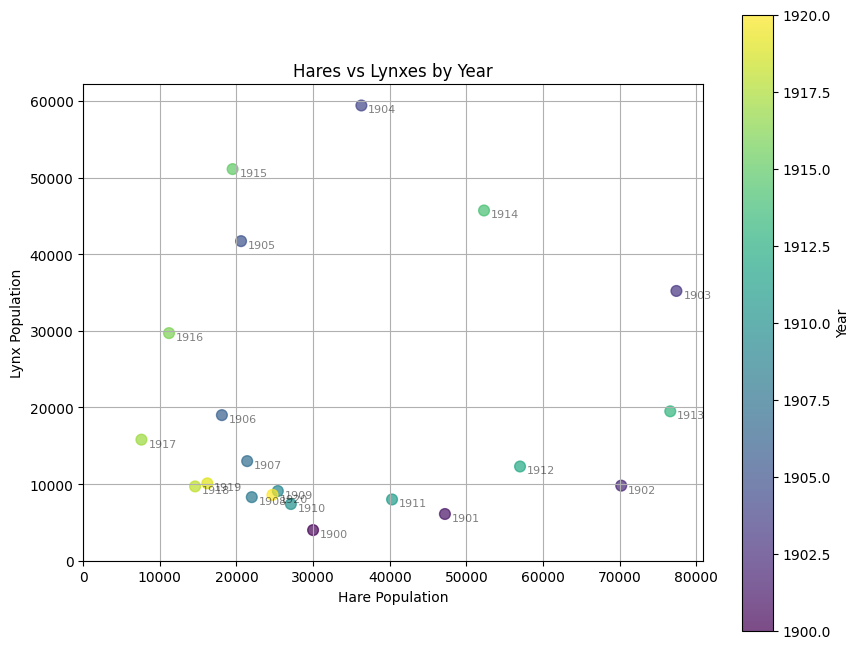

In [ ]:
plt.figure(figsize=(10, 8))
plt.scatter(hares, lynxes, c=years, cmap='viridis', s=60, alpha=0.7)
plt.colorbar(label='Year')
plt.xlabel('Hare Population')
plt.ylabel('Lynx Population')
plt.title('Hares vs Lynxes by Year')
plt.grid(True)
for i, year in enumerate(years):
    plt.annotate(year, (hares[i], lynxes[i]), xytext=(5, -5),
                 textcoords='offset points', fontsize=8, alpha=0.5)

plt.gca().set_aspect('equal')
plt.xticks(np.arange(0, 80001, 10000))
plt.yticks(np.arange(0, 60001, 10000))
plt.show()

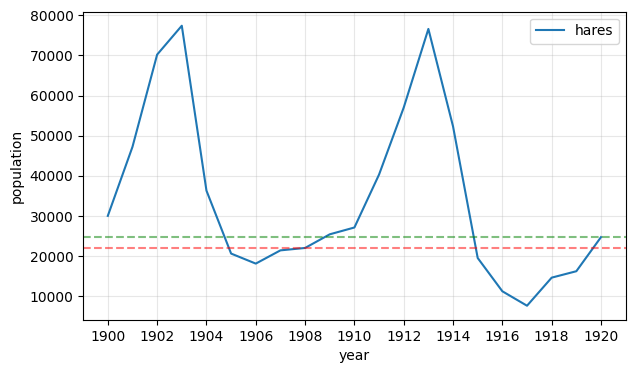

ration of error to actual: 0.11


In [ ]:
mean_trunc = np.median(hares[6:])
plt.figure(figsize=(7,4))
plt.plot(years, hares, label = 'hares')
plt.xlabel('year')
plt.ylabel('population')
plt.xticks(np.arange(min(years), max(years) + 1, 2))
plt.grid(True, alpha=0.3)
plt.axhline(y = mean_trunc, linestyle = '--', alpha = 0.5, color="red")
plt.axhline(y = hares[-1], linestyle = '--', alpha = 0.5, color="green")
plt.legend()
plt.show()

print(f"ration of error to actual: {(abs(hares[-1] - mean_trunc)/hares[-1]):.2f}")

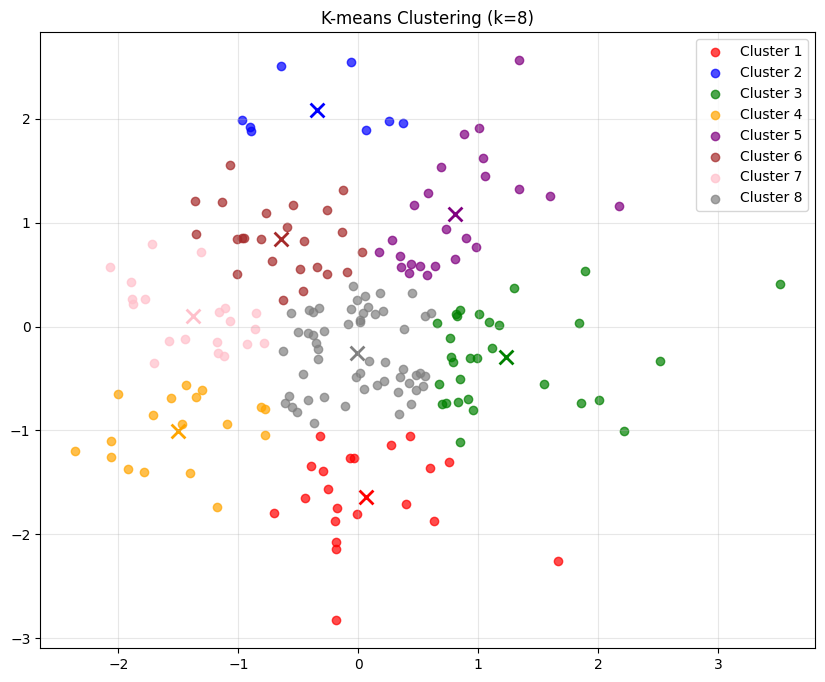

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def simple_kmeans(X, n_clusters, max_iters=100):
    n_samples = X.shape[0]
    centroids = X[np.random.choice(n_samples, n_clusters, replace=False)]

    for _ in range(max_iters):
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)

        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(n_clusters)])

        if np.allclose(centroids, new_centroids):
            break

        centroids = new_centroids

    return centroids, labels

data = np.random.randn(200, 2)

k = 8

centroids, labels = simple_kmeans(data, k)

plt.figure(figsize=(10, 8))
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray']

for i in range(k):
    cluster_data = data[labels == i]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1],
               c=colors[i % len(colors)], alpha=0.7, label=f'Cluster {i+1}')
    plt.scatter(centroids[i, 0], centroids[i, 1],
               marker='x', s=100, color=colors[i % len(colors)], linewidth=2)

plt.title(f'K-means Clustering (k={k})')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Cluster 0 corresponds to digit 4
Number of points that are actually digit 4: 3733.0 out of 10468.0
Cluster 1 corresponds to digit 3
Number of points that are actually digit 3: 4634.0 out of 8747.0
Cluster 2 corresponds to digit 2
Number of points that are actually digit 2: 4896.0 out of 5474.0
Cluster 3 corresponds to digit 0
Number of points that are actually digit 0: 2977.0 out of 3711.0
Cluster 4 corresponds to digit 0
Number of points that are actually digit 0: 3205.0 out of 3555.0
Cluster 5 corresponds to digit 6
Number of points that are actually digit 6: 5687.0 out of 6613.0
Cluster 6 corresponds to digit 7
Number of points that are actually digit 7: 4397.0 out of 10322.0
Cluster 7 corresponds to digit 1
Number of points that are actually digit 1: 4370.0 out of 6824.0
Cluster 8 corresponds to digit 8
Number of points that are actually digit 8: 4048.0 out of 7733.0
Cluster 9 corresponds to digit 1
Number of points that are actually digit 1: 3454.0 out of 6553.0


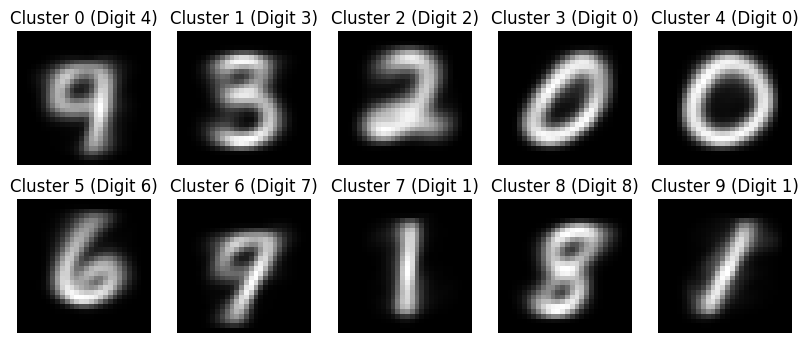

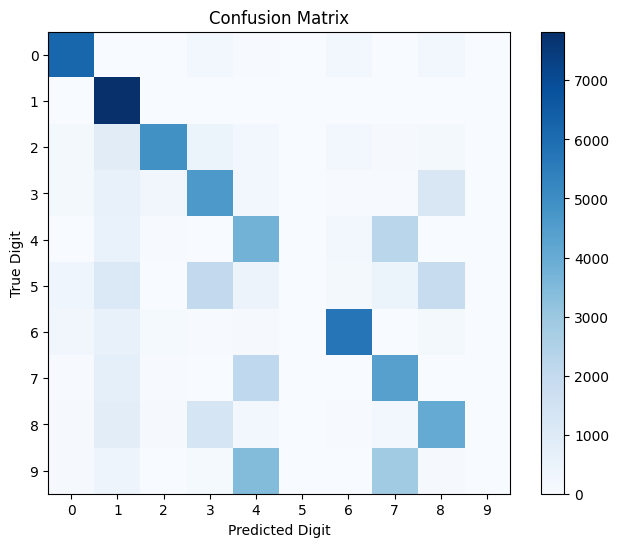

In [2]:
import random
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml
from scipy.stats import mode
from sklearn.metrics import confusion_matrix

def distance(x, y):
    return np.linalg.norm(x - y)

def find_area(objects, N, M):
    lower_bounds = np.min(objects, axis=0)
    upper_bounds = np.max(objects, axis=0)
    return list(zip(lower_bounds, upper_bounds))

def initiate_centers(area, k):
    centers = []
    for i in range(k):
        center = [random.uniform(low, high) for low, high in area]
        centers.append(center)
    return np.array(centers)

def recenter(objects, clusters, N, M, k):
    centers = np.zeros((k, M))
    nums = np.zeros(k)

    for i in range(N):
        cluster_id = clusters[i]
        centers[cluster_id] += objects[i]
        nums[cluster_id] += 1

    for i in range(k):
        if nums[i] > 0:
            centers[i] /= nums[i]

    return centers

def recluster(centers, objects, N, k):
    new_clusters = np.zeros(N, dtype=int)

    for i in range(N):
        distances = np.linalg.norm(centers - objects[i], axis=1)
        new_clusters[i] = np.argmin(distances)

    return new_clusters

def cluster_distances(objects, clusters, centers, N):
    result = 0
    for i in range(N):
        result += distance(centers[clusters[i]], objects[i]) ** 2
    return result

def kmeans_clusterization(objects, N, M, k, max_iter, threshold):
    area = find_area(objects, N, M)
    centers = initiate_centers(area, k)
    dispersion = threshold + 1
    clusters = recluster(centers, objects, N, k)
    iters = 0
    old_distances = cluster_distances(objects, clusters, centers, N)

    while (iters < max_iter) and (dispersion > threshold):
        new_centers = recenter(objects, clusters, N, M, k)
        centers = new_centers
        clusters = recluster(centers, objects, N, k)
        new_distances = cluster_distances(objects, clusters, centers, N)
        dispersion = abs(old_distances - new_distances)
        old_distances = new_distances
        iters += 1

    return clusters, centers

images, labels = fetch_openml('mnist_784', return_X_y=True, as_frame=False)
N, M = images.shape
k = 10
max_iter = 100
threshold = 1e-4

clusters, centers = kmeans_clusterization(images, N, M, k, max_iter, threshold)

labels_int = labels.astype(int)
digit_for_cluster = np.zeros(k, dtype=int)
correct_counts = np.zeros(k)
cluster_sizes = np.zeros(k)

for i in range(k):
    indices = np.where(clusters == i)[0]
    cluster_labels = labels_int[indices]
    cluster_sizes[i] = len(cluster_labels)
    if cluster_sizes[i] > 0:
        digit = mode(cluster_labels).mode
        digit_for_cluster[i] = digit
        correct_counts[i] = np.sum(cluster_labels == digit)
    else:
        digit_for_cluster[i] = -1
        correct_counts[i] = 0

for i in range(k):
    print(f"Cluster {i} corresponds to digit {digit_for_cluster[i]}")
    print(f"Number of points that are actually digit {digit_for_cluster[i]}: {correct_counts[i]} out of {cluster_sizes[i]}")

plt.figure(figsize=(10, 4))
for i in range(k):
    plt.subplot(2, 5, i + 1)
    plt.imshow(centers[i].reshape(28, 28), cmap='gray')
    plt.title(f"Cluster {i} (Digit {digit_for_cluster[i]})")
    plt.axis('off')
plt.show()

predicted_labels = np.array([digit_for_cluster[c] for c in clusters])

cm = confusion_matrix(labels_int, predicted_labels)

plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, np.arange(10))
plt.yticks(tick_marks, np.arange(10))
plt.xlabel('Predicted Digit')
plt.ylabel('True Digit')
plt.show()